In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'/content/smoking.csv')

In [3]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [5]:
data.isna().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.smoking.value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [9]:
le = LabelEncoder()
ss = StandardScaler()

In [10]:
for i in data.columns:
  if data[i].dtype == 'object':
    data[i] = le.fit_transform(data[i])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  int64  
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

<Axes: xlabel='gender', ylabel='count'>

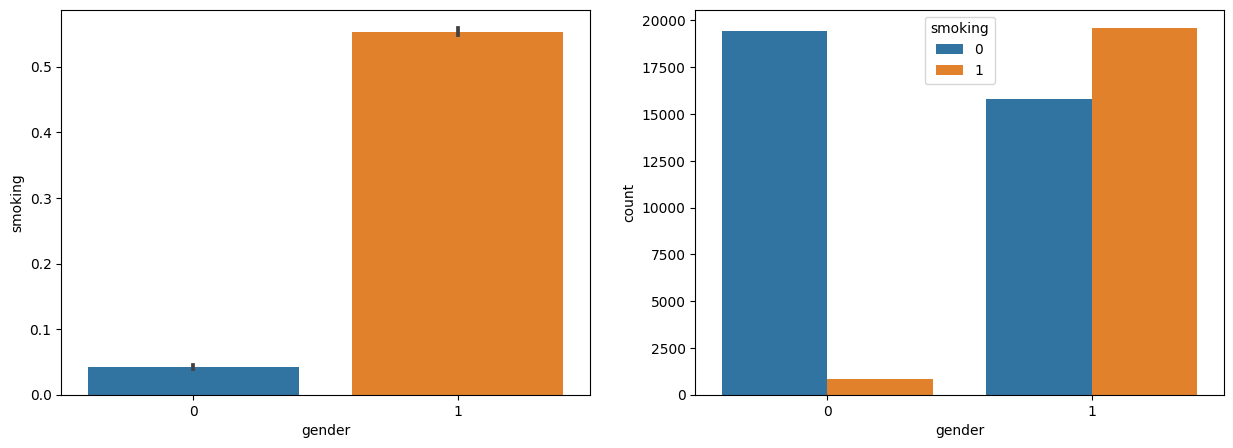

In [12]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x = data.gender,y = data.smoking)
plt.subplot(1,2,2)
sns.countplot(x = data.gender,hue = data.smoking)

<Axes: xlabel='age', ylabel='count'>

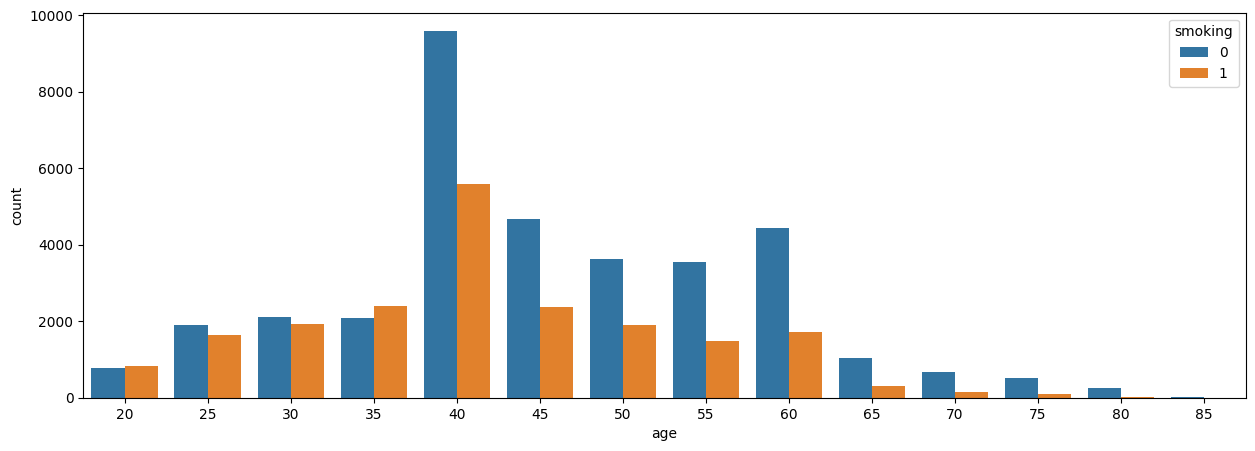

In [13]:
plt.figure(figsize = (15,5))
sns.countplot(x = data.age,hue = data.smoking)

<Axes: ylabel='smoking'>

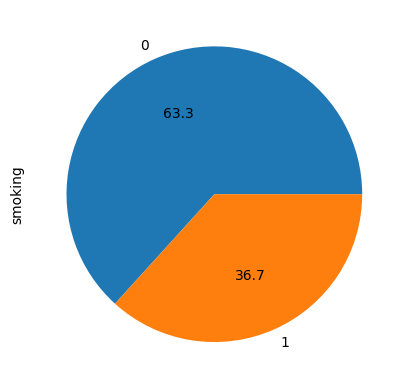

In [14]:
data.smoking.value_counts().plot.pie(autopct = '%0.1f')

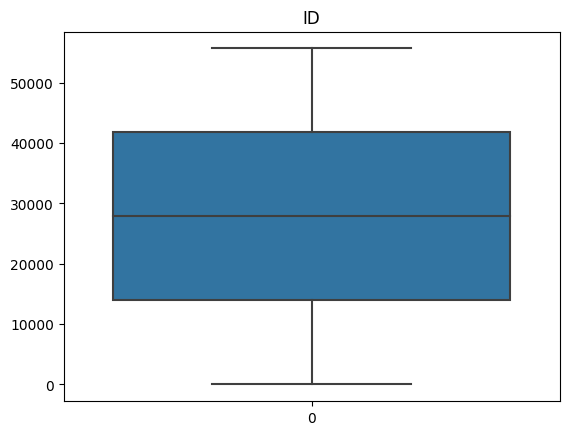

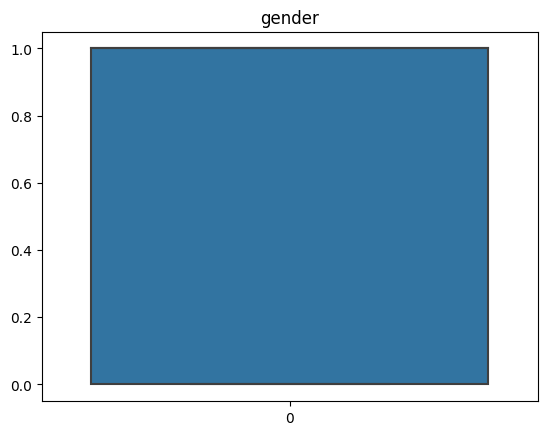

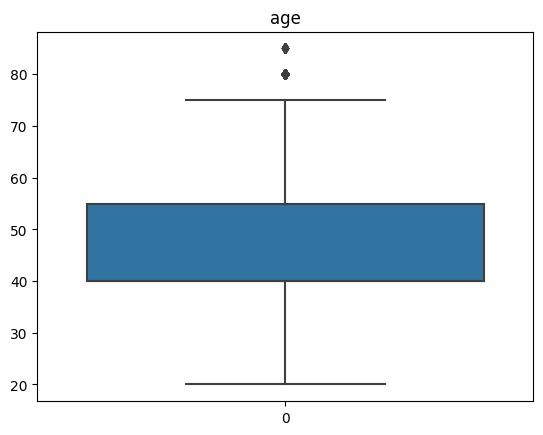

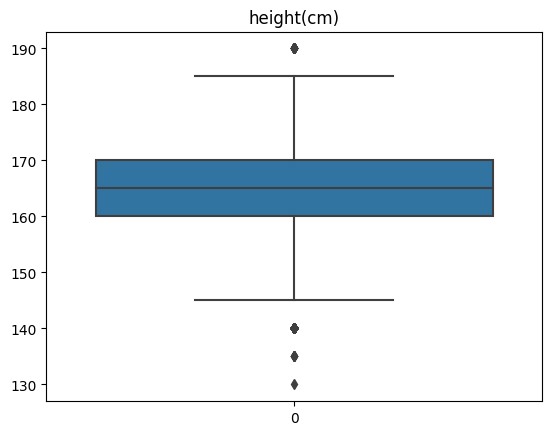

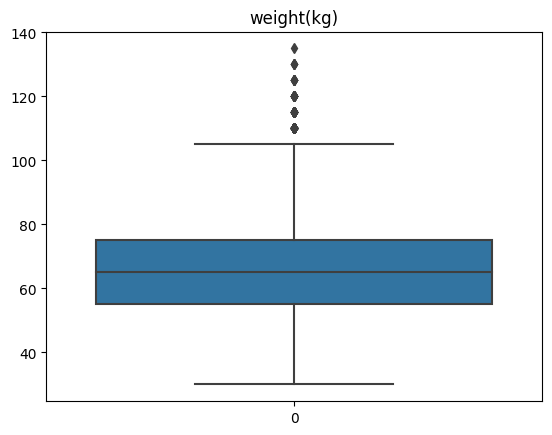

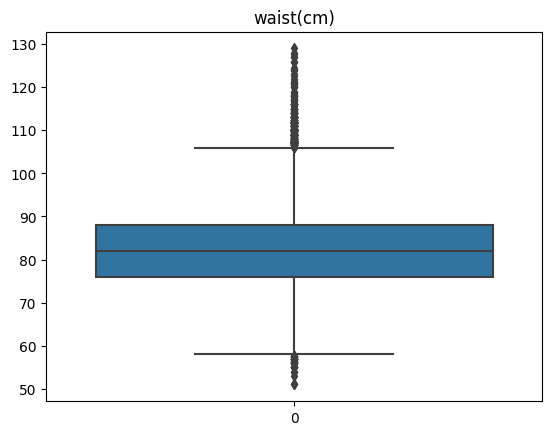

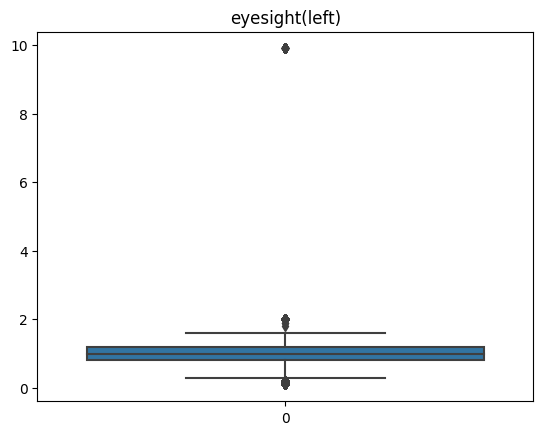

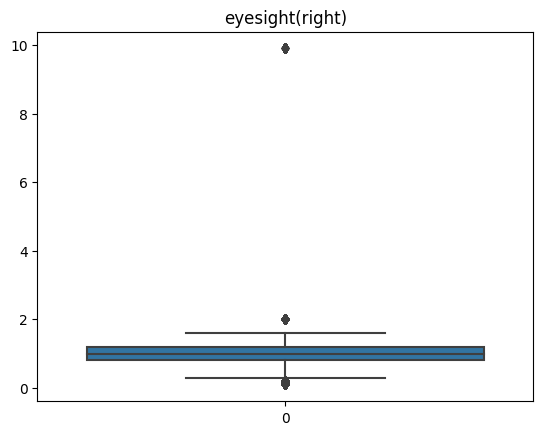

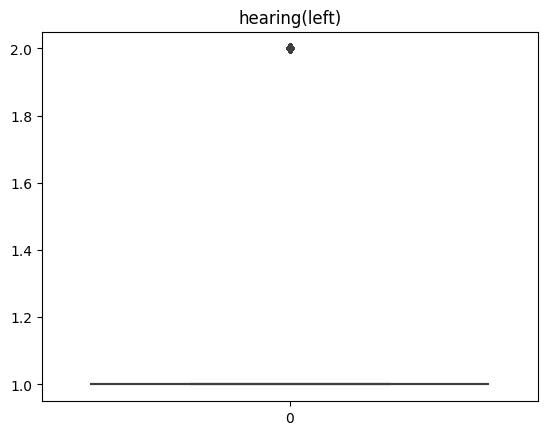

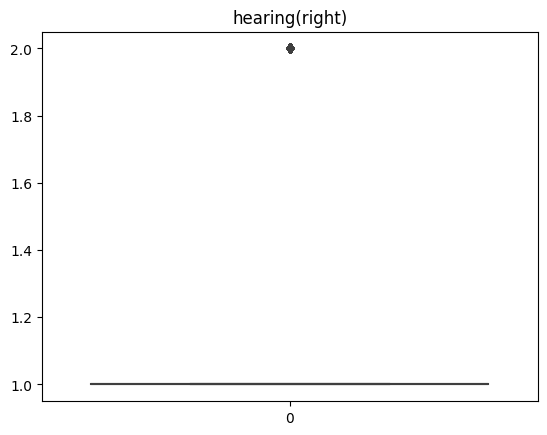

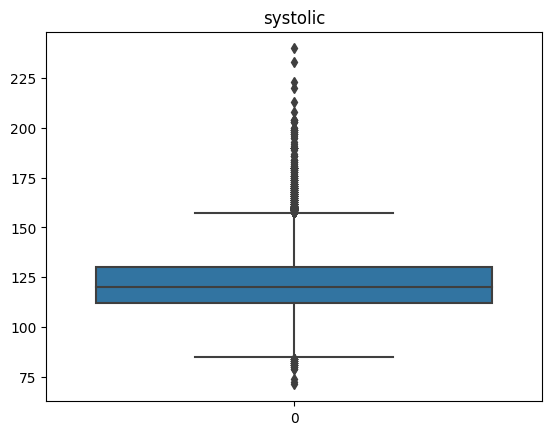

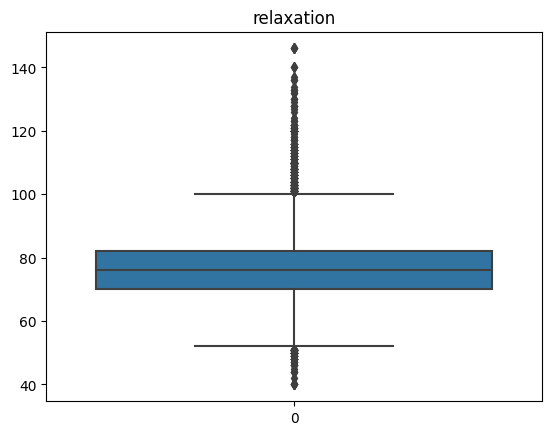

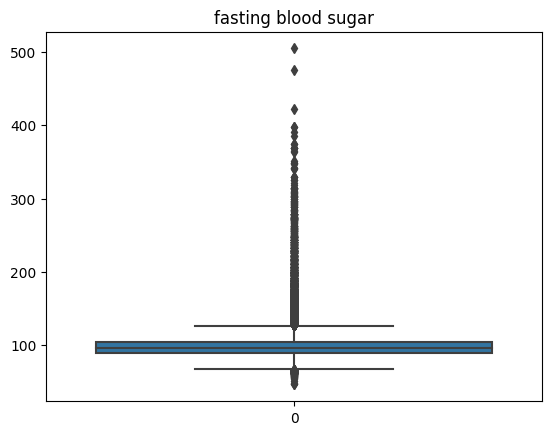

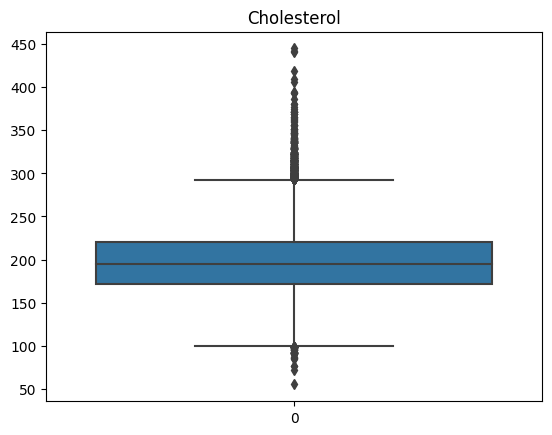

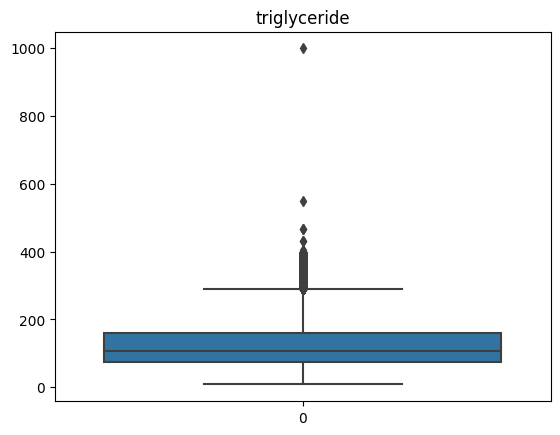

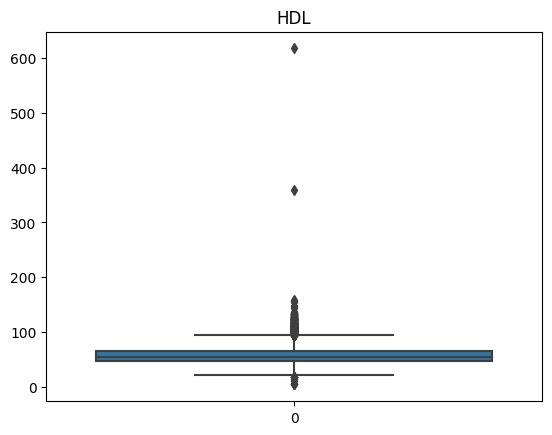

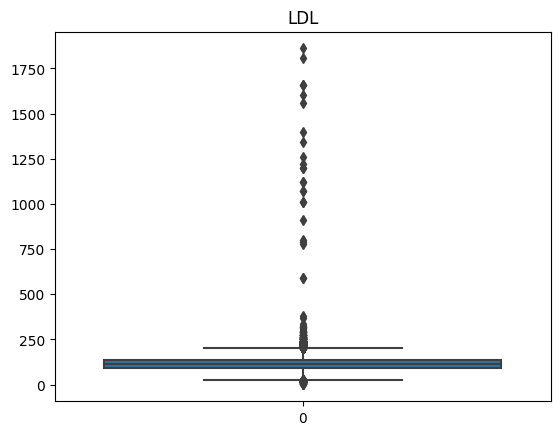

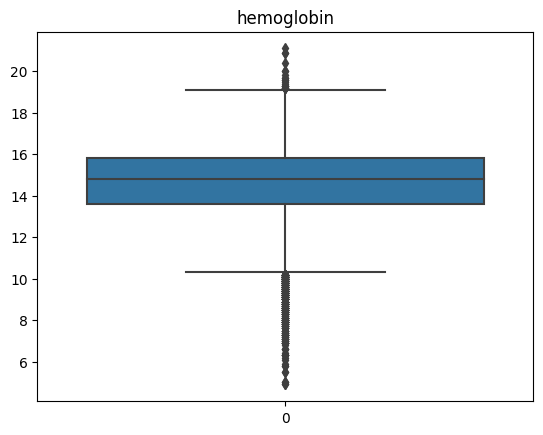

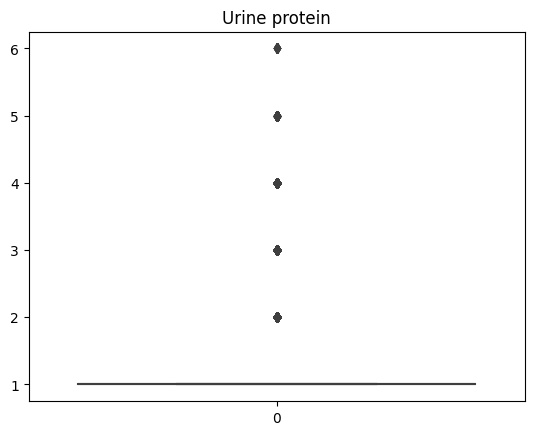

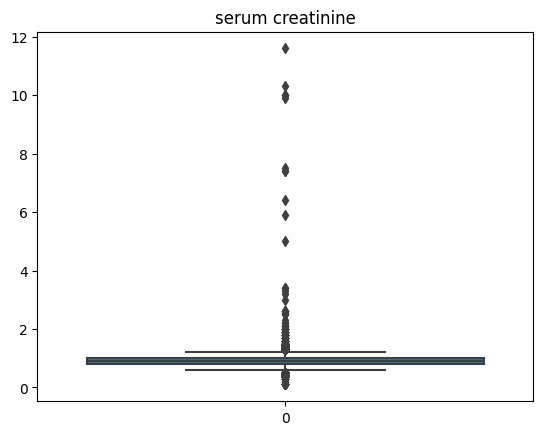

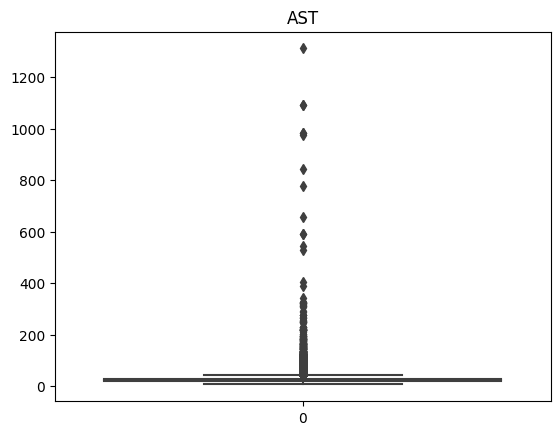

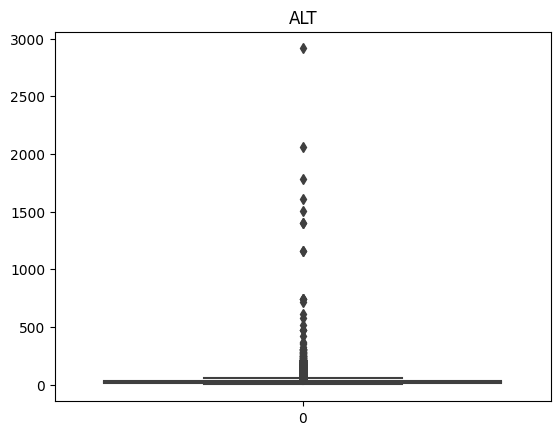

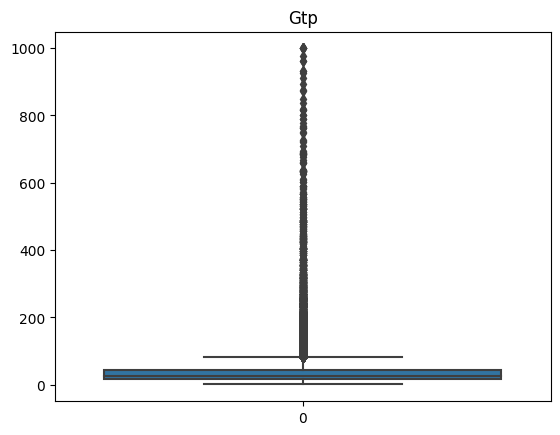

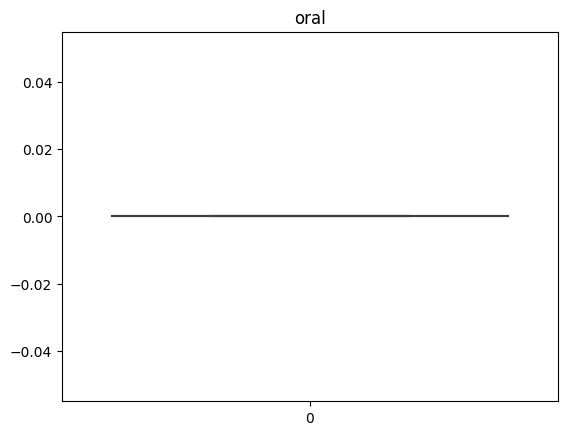

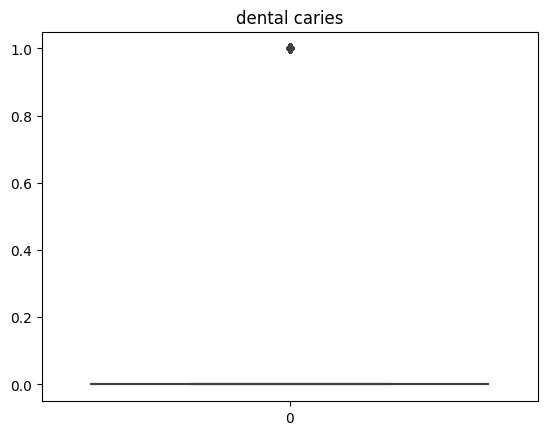

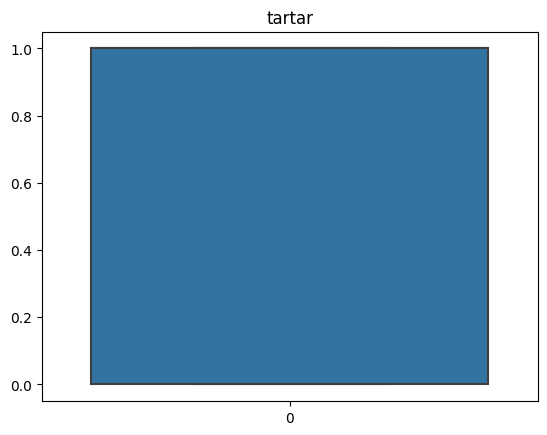

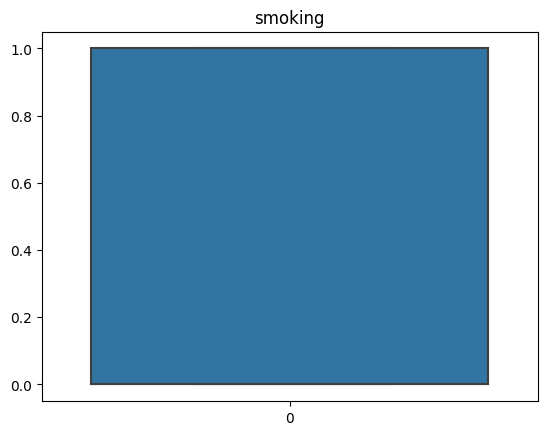

In [17]:
for i in data.columns:
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()

In [22]:
col = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']
for i in col:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  IQR = q3-q1
  data = data[(data[i]<=q3+1.5*IQR) & (data[i]>=q1-1.5*IQR)]

In [23]:
data.shape

(33952, 27)

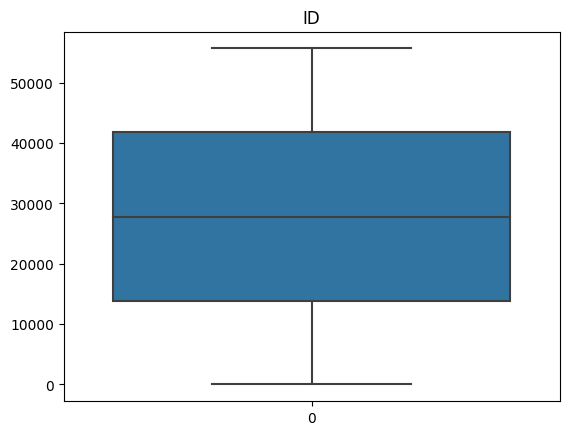

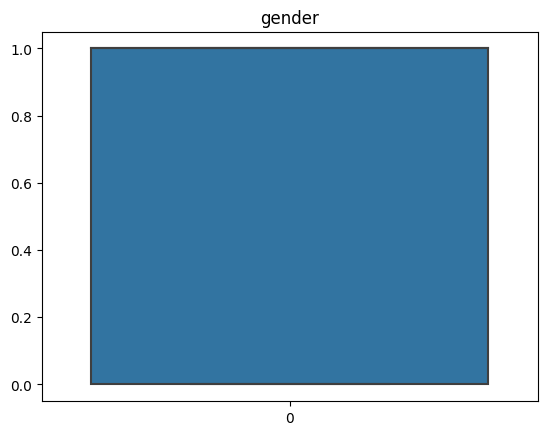

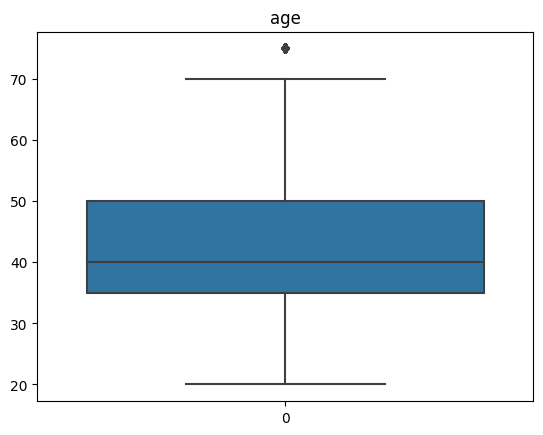

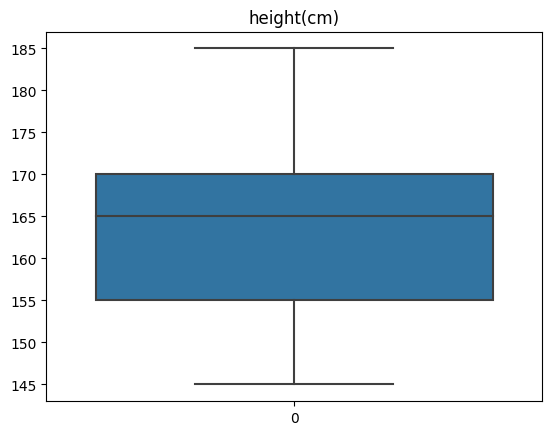

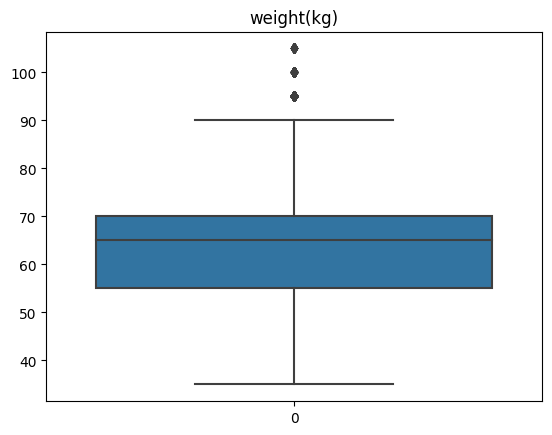

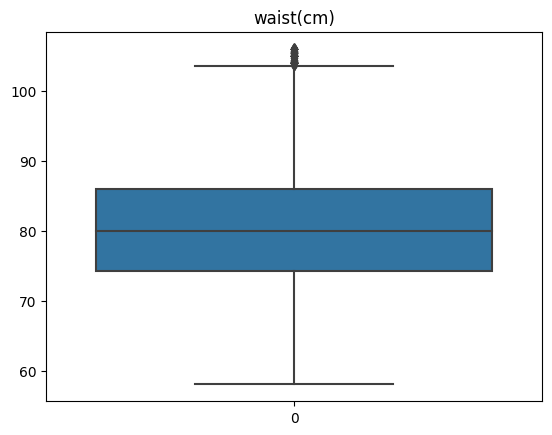

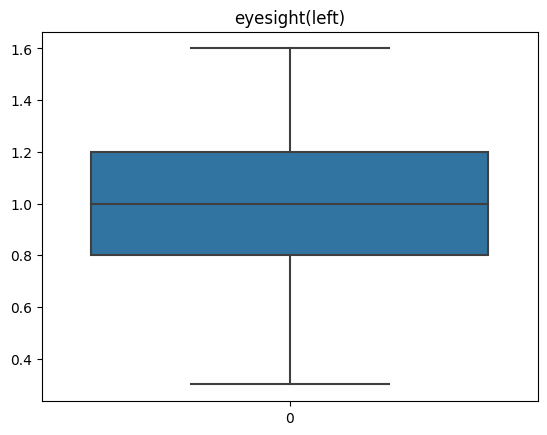

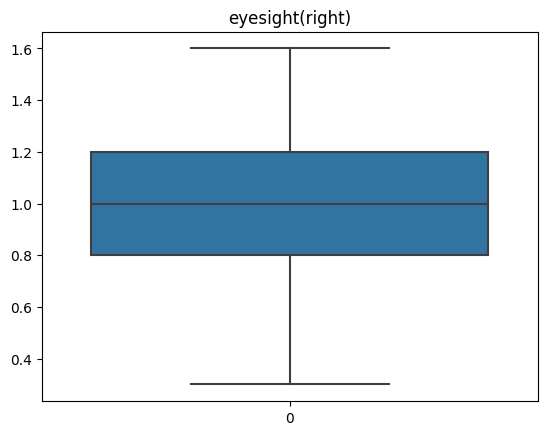

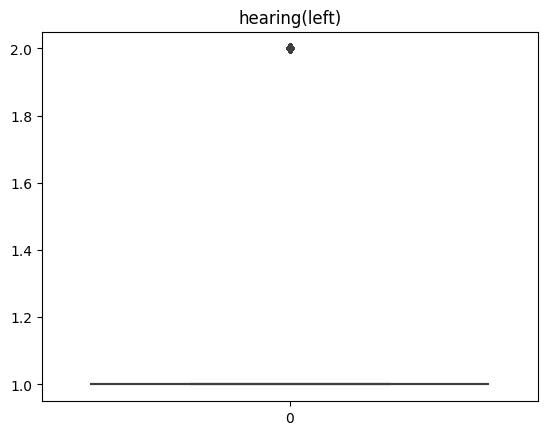

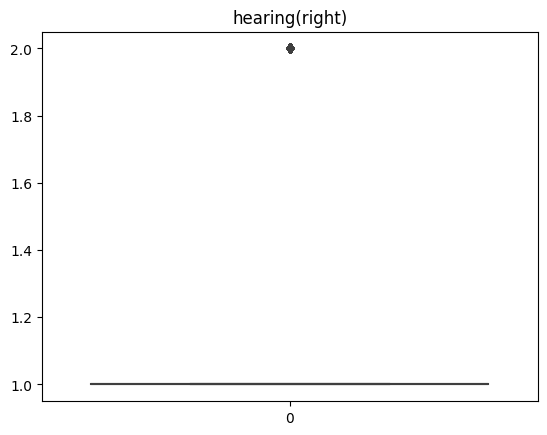

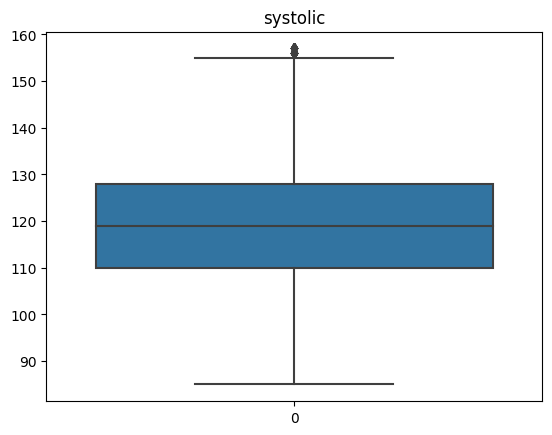

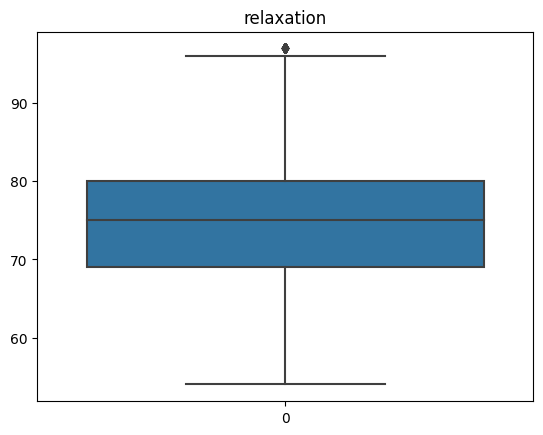

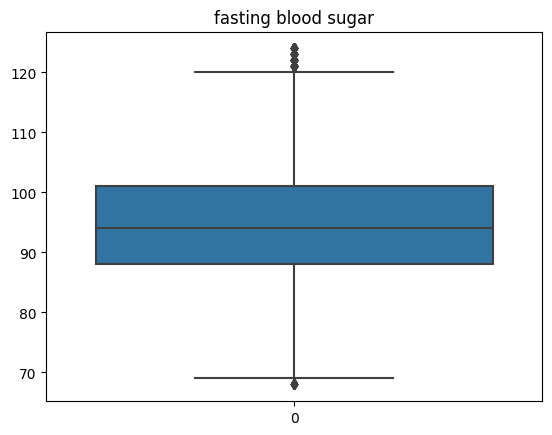

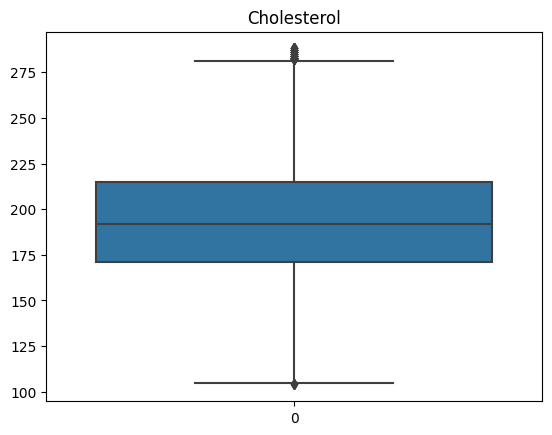

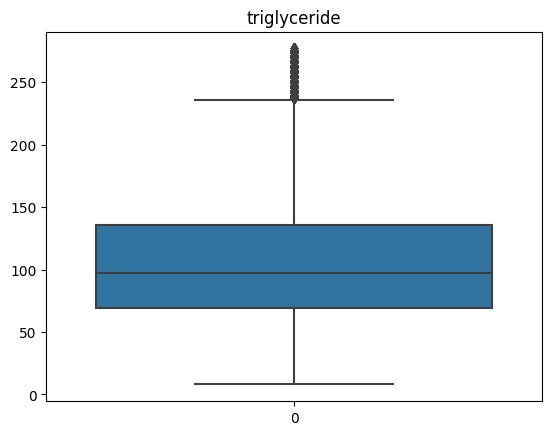

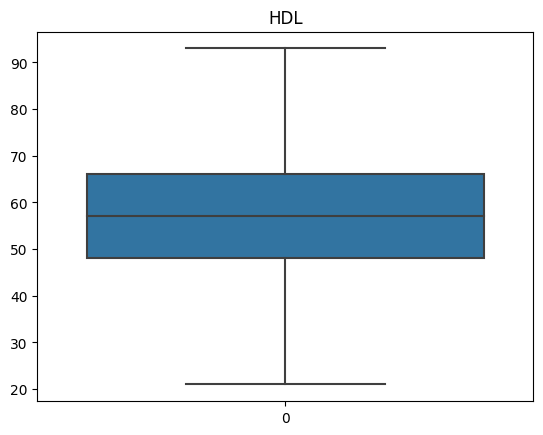

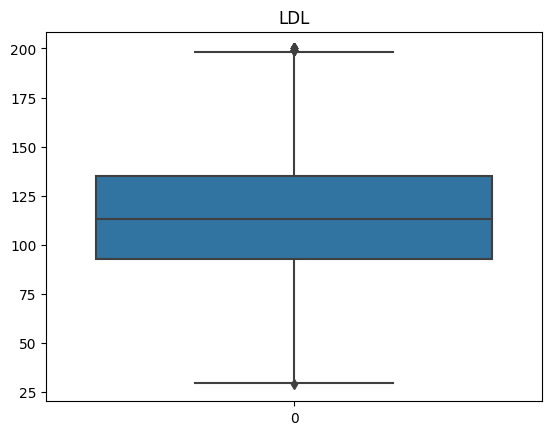

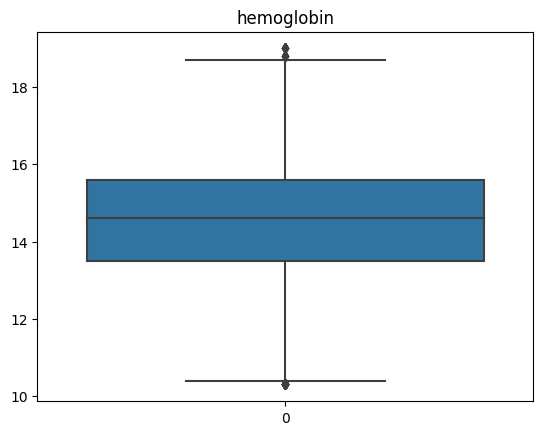

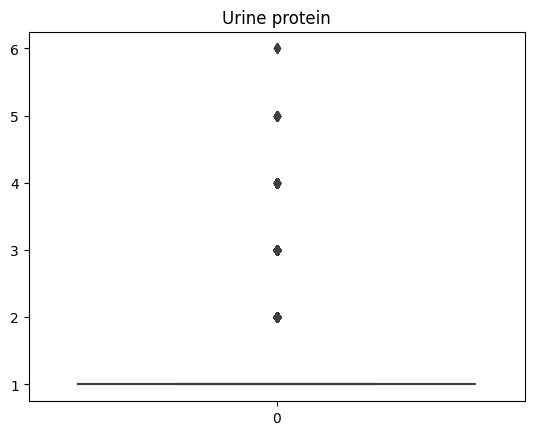

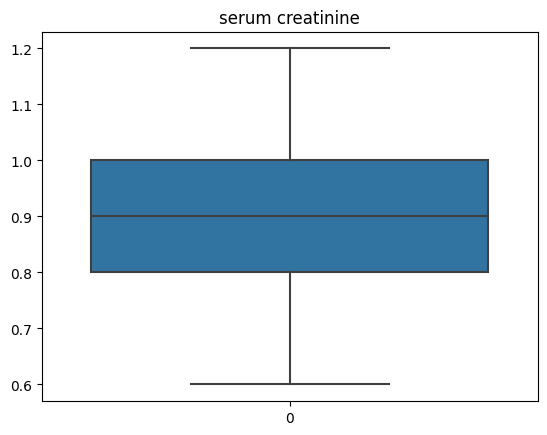

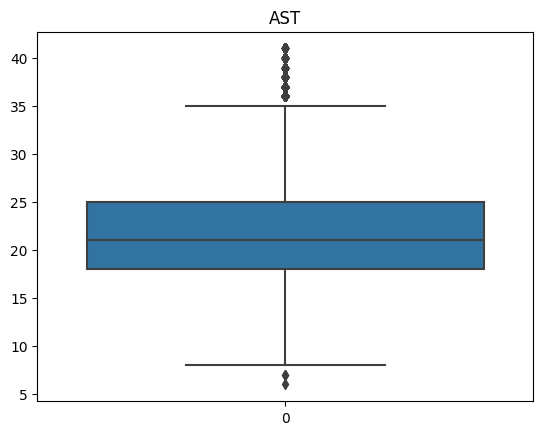

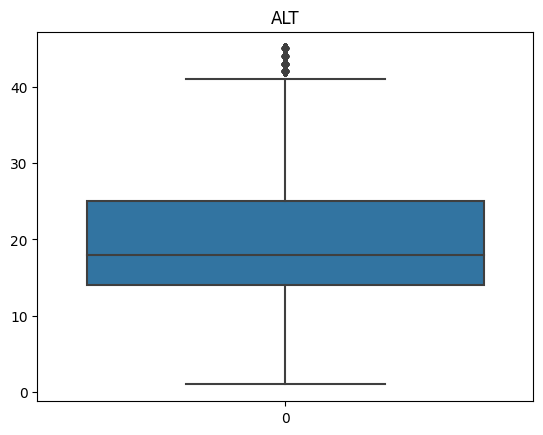

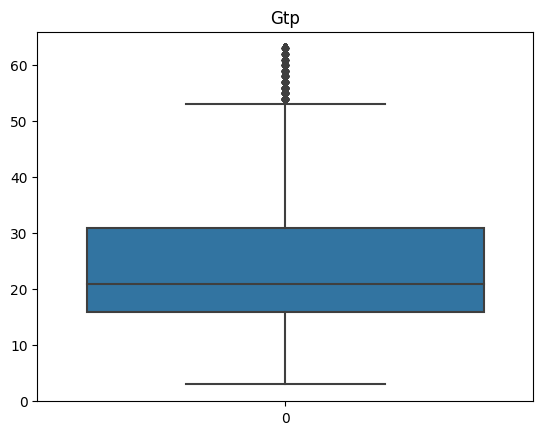

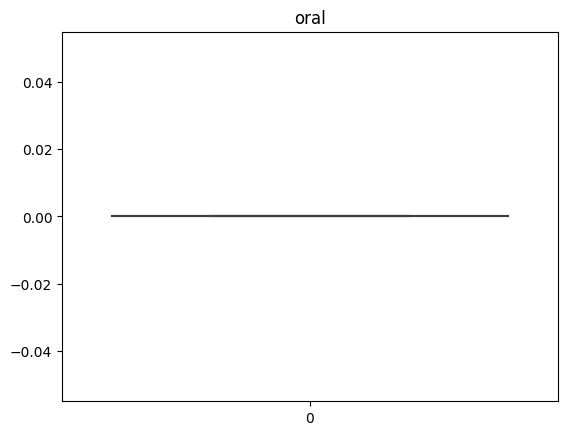

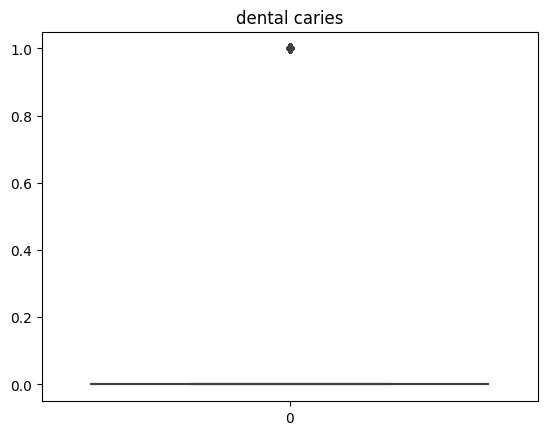

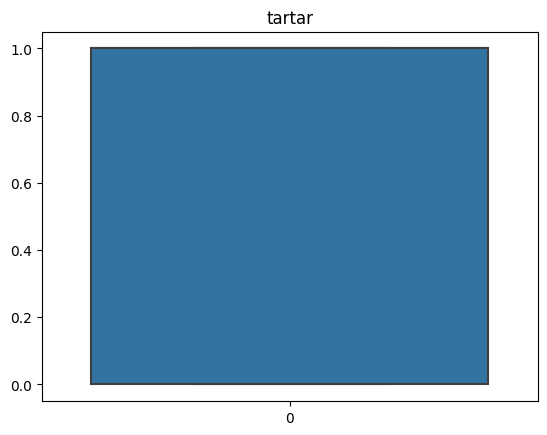

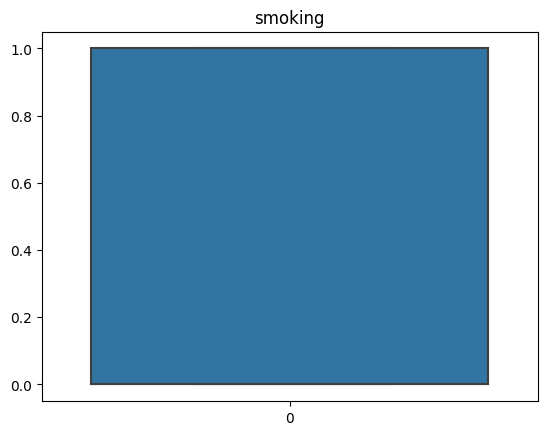

In [24]:
for i in data.columns:
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()

In [27]:
data.smoking.value_counts()

0    23039
1    10913
Name: smoking, dtype: int64

In [37]:
index = np.random.choice(np.where(data.smoking == 0)[0],12126)
index.shape

(12126,)

In [32]:
data.reset_index(inplace = True)

In [33]:
data.drop('index',axis = 1,inplace = True)

In [35]:
data.drop(index,axis = 0,inplace = True)

In [36]:
data.smoking.value_counts()

0    13647
1    10913
Name: smoking, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x = data.drop('smoking',axis = 1)
y = data['smoking']

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state = 42)
xtrain.shape,ytrain.shape

((19648, 26), (19648,))

In [44]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [39]:
lda = LinearDiscriminantAnalysis()

In [45]:
lda.fit(xtrain,ytrain)

LinearDiscriminantAnalysis()

In [46]:
lda.coef_

array([[ 9.60324907e-03,  1.42232501e+00,  4.86344990e-02,
         1.71716138e-01, -7.01709930e-02, -9.49510276e-02,
        -3.42218052e-02,  2.95207616e-02, -4.52503241e-02,
        -7.31756950e-03, -1.79147817e-01,  6.59389928e-02,
        -7.70048516e-04,  8.63105279e-02,  2.25177959e-01,
        -1.00310216e-01, -1.87073600e-01,  2.09743785e-01,
        -1.22197096e-02, -1.56364144e-01, -8.72551737e-02,
        -2.09090025e-01,  4.72298916e-01, -5.73890492e-17,
         1.59285094e-01,  1.65003631e-01]])

In [51]:
lda_coef = np.exp(np.abs(lda.coef_)).flatten()
lda_coef

array([1.00964951, 4.14675047, 1.04983656, 1.18734074, 1.07269159,
       1.099605  , 1.03481411, 1.02996082, 1.04628974, 1.00734441,
       1.19619755, 1.06816155, 1.00077035, 1.0901448 , 1.2525456 ,
       1.10551381, 1.20571602, 1.23336201, 1.01229468, 1.1692519 ,
       1.09117508, 1.23255595, 1.60367668, 1.        , 1.17267222,
       1.1793974 ])

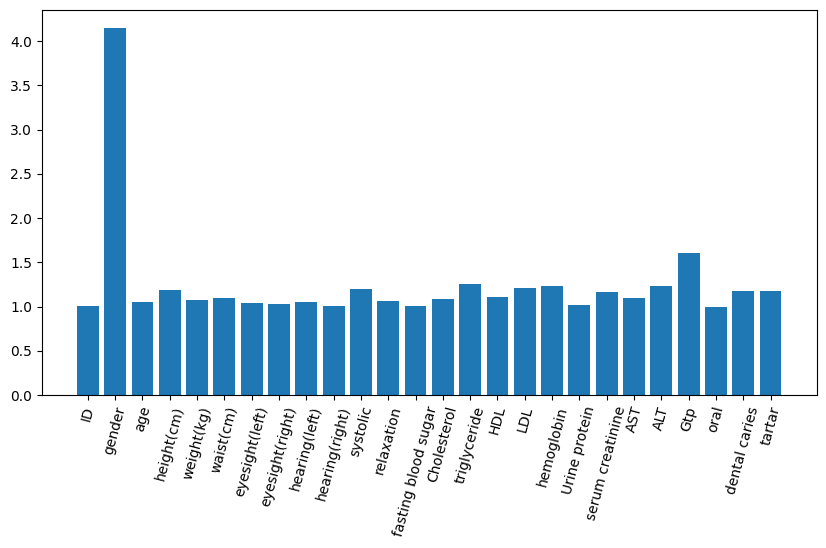

In [54]:
plt.figure(figsize = (10,5))
plt.bar(x.columns,lda_coef)
plt.xticks(rotation = 75)
plt.show()

In [57]:
scores = pd.DataFrame({'features':x.columns,'scores':lda_coef})
scores.sort_values('scores',ascending = False,inplace = True)
scores

,features,scores
1,gender,4.146750
22,Gtp,1.603677
14,triglyceride,1.252546
17,hemoglobin,1.233362
21,ALT,1.232556
16,LDL,1.205716
10,systolic,1.196198
3,height(cm),1.187341
25,tartar,1.179397
24,dental caries,1.172672


In [59]:
index = scores.head(15).index
index

Int64Index([1, 22, 14, 17, 21, 16, 10, 3, 25, 24, 19, 15, 5, 20, 13], dtype='int64')

In [61]:
xtrain = xtrain[:,index]

In [62]:
xtest = xtest[:,index]

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier

In [66]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
bc = BaggingClassifier(n_estimators = 200)
et = ExtraTreesClassifier(n_estimators = 200)
rf = RandomForestClassifier(n_estimators = 200)

In [67]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [68]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [69]:
bc.fit(xtrain,ytrain)

BaggingClassifier(n_estimators=200)

In [70]:
et.fit(xtrain,ytrain)

ExtraTreesClassifier(n_estimators=200)

In [71]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [72]:
ypred_lr = lr.predict(xtest)
ypred_dt = dt.predict(xtest)
ypred_bc = bc.predict(xtest)
ypred_et = et.predict(xtest)
ypred_rf = rf.predict(xtest)

In [73]:
from sklearn.metrics import accuracy_score,classification_report

In [76]:
accuracy_score(ypred_lr,ytest)

0.7575325732899023

In [77]:
accuracy_score(ypred_dt,ytest)

0.7577361563517915

In [78]:
accuracy_score(ypred_bc,ytest)

0.802728013029316

In [79]:
accuracy_score(ypred_et,ytest)

0.8082247557003257

In [80]:
accuracy_score(ypred_rf,ytest)

0.8088355048859935